**PRETRAINED MODEL WITH A DATASET 'news_summary.csv' from kaggle**

In [1]:
! pip install simplet5 -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.7/527.7 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 33.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
arviz 0.15.1 requires setuptools>=60.0.0, 

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv("news_summary.csv" ,encoding='latin-1' ,usecols=['headlines', 'text'])

T5 Data Prep with Training Data Column Names - source_text & target_text


In [18]:
df = df.rename(columns={"headlines":"target_text", "text":"source_text"})
df = df[['source_text', 'target_text']]

In [19]:
df.head()

,source_text,target_text
0,The Administration of Union Territory Daman an...,Daman & Diu revokes mandatory Rakshabandhan in...
1,Malaika Arora slammed an Instagram user who tr...,Malaika slams user who trolled her for 'divorc...
2,The Indira Gandhi Institute of Medical Science...,'Virgin' now corrected to 'Unmarried' in IGIMS...
3,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Aaj aapne pakad liya: LeT man Dujana before be...
4,Hotels in Maharashtra will train their staff t...,Hotel staff to get training to spot signs of s...


T5 Data Prep with Summarization Tax Prefix


In [20]:
df['source_text'] = "summarize: " + df['source_text']

In [21]:
df

,source_text,target_text
0,summarize: The Administration of Union Territo...,Daman & Diu revokes mandatory Rakshabandhan in...
1,summarize: Malaika Arora slammed an Instagram ...,Malaika slams user who trolled her for 'divorc...
2,summarize: The Indira Gandhi Institute of Medi...,'Virgin' now corrected to 'Unmarried' in IGIMS...
3,summarize: Lashkar-e-Taiba's Kashmir commander...,Aaj aapne pakad liya: LeT man Dujana before be...
4,summarize: Hotels in Maharashtra will train th...,Hotel staff to get training to spot signs of s...
...,...,...
4509,summarize: Fruit juice concentrate maker Rasna...,Rasna seeking ?250 cr revenue from snack categ...
4510,summarize: Former Indian cricketer Sachin Tend...,Sachin attends Rajya Sabha after questions on ...
4511,"summarize: Aamir Khan, while talking about rea...",Shouldn't rob their childhood: Aamir on kids r...
4512,summarize: The Maharashtra government has init...,"Asha Bhosle gets ?53,000 power bill for unused..."


In [24]:
train_df, test_df = train_test_split(df, test_size=0.3)
train_df.shape, test_df.shape

((3159, 2), (1355, 2))

Using SimpleT5 for Model Training - Instantiate, Download Pre-trained Model

In [22]:
from simplet5 import SimpleT5

model = SimpleT5()
model.from_pretrained(model_type="t5", model_name="t5-base")

INFO:pytorch_lightning.utilities.seed:Global seed set to 42


Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

Model Training

In [25]:
model.train(train_df=train_df[:5000],
      eval_df=test_df[:100],
      source_max_token_len=128,
      target_max_token_len=50,
      batch_size=8, max_epochs=5, use_gpu=True)

INFO:pytorch_lightning.utilities.distributed:GPU available: True, used: True
INFO:pytorch_lightning.utilities.distributed:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.distributed:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.accelerators.gpu:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.614   Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.seed:Global seed set to 42


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Output Folder Content

In [26]:
! ( cd outputs; ls )

simplet5-epoch-0-train-loss-1.5709-val-loss-1.3795
simplet5-epoch-1-train-loss-1.1512-val-loss-1.368
simplet5-epoch-2-train-loss-0.913-val-loss-1.3893
simplet5-epoch-3-train-loss-0.7407-val-loss-1.4604
simplet5-epoch-4-train-loss-0.5959-val-loss-1.4964


Model Inference

In [27]:
model.load_model("/content/outputs/simplet5-epoch-0-train-loss-1.5709-val-loss-1.3795", use_gpu=True)

In [28]:
import pandas as pd
data_label_1 = pd.read_csv('labeled_2023_04_28.csv')
data_label_2 = pd.read_csv('labeled_2023_05_08_version_final.csv')
df1 = pd.concat([data_label_1, data_label_2], ignore_index=True)
df1.head()

,Unnamed: 0,id,lang,isDuplicate,date,time,dateTime,dateTimePub,dataType,sim,...,createdAt,country,location,translated,translated_body,translated_title,clean_text,is_relevant,importance_score,label
0,0,7095357446,eng,False,2022-06-28,20:25:00,2022-06-28T20:25:00Z,2022-06-28T20:25:00Z,news,0.866667,...,2022-06-28T20:47:00Z,NaN,NaN,False,NaN,NaN,by jessica damiano associated press\n\nthe co...,False,NaN,NaN
1,1,7100315028,eng,False,2022-07-02,16:49:00,2022-07-02T16:49:00Z,2022-07-02T16:48:00Z,news,0.937255,...,2022-07-02T17:07:00Z,NaN,NaN,False,NaN,NaN,the cost of everything from gas to burgers may...,False,NaN,NaN
2,2,7095328304,eng,False,2022-06-28,19:51:00,2022-06-28T19:51:00Z,2022-06-28T19:50:00Z,news,0.901961,...,2022-06-28T20:47:00Z,NaN,NaN,False,NaN,NaN,by jessica damiano associated press\n\nthe co...,False,NaN,NaN
3,3,7095562326,eng,False,2022-06-29,01:33:00,2022-06-29T01:33:00Z,2022-06-29T01:32:00Z,news,0.894118,...,2022-06-29T03:07:00Z,NaN,NaN,False,NaN,NaN,by jessica damiano associated press\n\nthe co...,False,NaN,NaN
4,4,b-7131974343,eng,False,2022-07-29,02:42:00,2022-07-29T02:42:00Z,2022-07-29T02:42:00Z,blog,NaN,...,2022-07-29T03:07:00Z,NaN,NaN,False,NaN,NaN,the th edition of india foodex will be held f...,False,NaN,NaN


In [29]:
df1["clean_text"]

0     by jessica damiano  associated press\n\nthe co...
1     the cost of everything from gas to burgers may...
2     by jessica damiano  associated press\n\nthe co...
3     by jessica damiano  associated press\n\nthe co...
4     the th edition of india foodex  will be held f...
                            ...                        
95    dont say beer say bull was the longtime advert...
96    the introduction of machine learning and artif...
97    tokyo  the dollar was little changed against m...
98    stocknewscom initiated coverage on shares of l...
99    dubai uae july   prnewswire  this eid global t...
Name: clean_text, Length: 100, dtype: object

In [30]:
df1['clean_text'] = "summarize: " + df1['clean_text']

In [34]:
predictions1= []

# Parcourir tous les éléments de la colonne 'clean_text' et faire des prédictions
for text in df1['clean_text']:
    prediction = model.predict(text)
    predictions1.append(prediction)


In [35]:
# Ajouter la liste de prédictions en tant que nouvelle colonne à votre DataFrame
df1['summary'] = predictions1

In [36]:
df1['clean_text'][1]

'summarize: the cost of everything from gas to burgers may be rising but home gardeners growing produce have found a way at least to avoid paying  for a pound of tomatoes\n\nfertilizing those tomatoes  or cucumbers or flowers for that matter  is another story as the cost of soil amendments has been soaring\n\nall plants require nutrients which occur naturally in the soil but over time they become depleted and need to be replenished for plants to thrive\n\nmost fertilizers contain three primary nutrients nitrogen phosphorus and potassium represented by the npk ratio on the package nitrogen directs the plant to channel its energy into green leafy growth phosphorus encourages the development of roots fruits and flowers and potassium benefits the plants overall health\n\nmany fertilizers also contain secondary nutrients like calcium and magnesium and micronutrients like iron copper boron manganese zinc and molybdenum all are necessary for optimal plant growth\n\npeople are also reading  la

In [37]:
df1['summary'][1]

['Gardeners can save money by reducing the cost of fertilizer']

conversion la colonne summary en chaine

In [38]:
df1['summary'] = df1['summary'].apply(lambda x: x[0] if isinstance(x, list) else x)

In [39]:
df1['SUMMARY'] = df1['summary'].str.lower()

In [40]:
df1['SUMMARY'][0]

'gardeners save money by not buying fertilizers from supermarkets'

In [41]:
df1[["clean_text" , "SUMMARY" , "is_relevant"]]

,clean_text,SUMMARY,is_relevant
0,summarize: by jessica damiano associated pres...,gardeners save money by not buying fertilizers...,False
1,summarize: the cost of everything from gas to ...,gardeners can save money by reducing the cost ...,False
2,summarize: by jessica damiano associated pres...,gardeners can save money by using fish emulsio...,False
3,summarize: by jessica damiano associated pres...,how can you save money on fertilizer? jessica ...,False
4,summarize: the th edition of india foodex wil...,indian food industry to host expo at biec beng...,False
...,...,...,...
95,summarize: dont say beer say bull was the long...,schlitz malt liquor was first made with malted...,False
96,summarize: the introduction of machine learnin...,market driven by machine learning and artifici...,True
97,summarize: tokyo the dollar was little change...,tokyo on course for best week in 4 as investor...,True
98,summarize: stocknewscom initiated coverage on ...,stock news report on landmark bancorp nasdaqla...,False


In [42]:
from nltk.stem import PorterStemmer

def stem_words(word_list):
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in word_list]
    return stemmed_words

In [61]:
word_list = ['poland', 'perception', 'soil', 'pollen', 'traders', 'tender', 'tassel corn', 'supply', 'demand', 'planting', 'flowering', 'tomatoes', 'lutte', 'green', 'expansion', 'companies', 'corn', 'corps', 'planting', 'agriculture', 'farming', 'harvest', 'ags', 'cotton', 'COVID-19', 'soil health', 'irrigation systems', 'pest management', 'monsoon', 'agrochemical', 'rice', 'crop', 'drought', 'rainfall', 'food', 'pandemic', 'climatologist', 'farm', 'farmer', 'broccoli', 'cucumbers', 'squash', 'lettuce', 'beans', 'peppers', 'basil', 'eggplant', 'csa program', 'farms', 'plant nutrient', 'wheat', 'agricultural', 'moringa products', 'packaging', 'distribution', 'health benefits', 'growth', 'vendors', 'growth prospects', 'fast-growing segments', 'slow-growing segments', 'moringa seeds', 'oil', 'healthcare', 'personal care product industries', 'therapeutic potential', 'disposable incomes', 'exports', 'Offerings', 'market definition', 'market size', 'forecast', 'year-over-year growth', 'COVID-19 pandemic', 'price sensitivity', 'adoption lifecycle', 'price', 'Key purchase criteria', 'Growing demand', 'vegan demographics', 'vendor overview', 'product segments', 'farm technology', 'tractor', 'farm management', 'Production', 'soybeans', 'sugar', 'USDA', 'Biopesticides', 'organic agriculture', 'Marrone Bio Innovations', 'bioinsecticides', 'biofungicides', 'Bionematicides', 'Bioherbicides', 'fruits', 'vegetables', 'specialty crops', 'botanical', 'bacillus', 'trichoderma', 'streptomyces', 'institutional investors', 'COVID', 'ukrain', 'russia', 'war', 'cereals', 'season', 'seeds', 'yields', 'renewables', 'nutrient', 'grow', 'biopesticides', 'market', 'investment', 'stocknews', 'stock', 'trading', 'rating', 'chief', 'service', 'economic', 'statement', 'painfully', 'first', 'fresh', 'indonesia', 'say', 'bring', 'company', 'outbreak', 'record', 'private', 'sioux', 'russian', 'economist', 'health', 'look', 'tree', 'line', 'register', 'be', 'turkey', 'study', 'gold', 'analysis', 'practice', 'finance', 'would', 'apiary', 'canada', 'project', 'hormel', 'phosphorus', 'european', 'trend', 'intermediary', 'pose', 'remain', 'dividend', 'recycle', 'ukraine', 'compostable', 'ghana', 'pembina', 'disease', 'nutrien', 'change', 'million', 'compare', 'high', 'take', 'temperature', 'escalator', 'major', 'fruit', 'lakh', 'military', 'barchart', 'commodity', 'country', 'rural', 'reference', 'local', 'continue', 'daily', 'mexico', 'solution', 'segment', 'mike', 'go', 'fertilizer', 'year', 'quarter', 'talk', 'forward', 'share', 'deal', 'acreage', 'income', 'iaea', 'people', 'climate', 'marketsandmarkets', 'cola', 'moringa', 'energy', 'univar', 'clash', 'europe', 'rat', 'cent', 'weapon', 'ukrainian', 'data', 'week', 'sow', 'exhibit', 'product', 'pest', 'ship', 'grain', 'production', 'government', 'arm', 'progress', 'insect', 'organic', 'bloomberg', 'china','innospec','chemical','nebraska','intelligence','organization','u.s.','sudan','california','india','brazil', 'argentine', 'USA', 'italy', 'germany', 'spain',]

In [44]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

textrank algo

In [45]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
import string
import networkx as nx
from nltk.tokenize import sent_tokenize

def textrank(text, top_n):
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)

    # Tokenize each sentence into words and remove punctuation
    words = [word.lower() for sentence in sentences for word in word_tokenize(sentence) if word not in string.punctuation]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Calculate word frequencies
    word_frequencies = FreqDist(words)

    # Build the graph representation
    graph = nx.Graph()
    graph.add_nodes_from(set(words))

    # Create edges between words based on co-occurrence
    for sentence in sentences:
        sentence_words = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(sentence) if word not in string.punctuation]
        for i in range(len(sentence_words)):
            for j in range(i + 1, len(sentence_words)):
                if graph.has_edge(sentence_words[i], sentence_words[j]):
                    graph[sentence_words[i]][sentence_words[j]]['weight'] += 1
                else:
                    graph.add_edge(sentence_words[i], sentence_words[j], weight=1)

    # Calculate the PageRank scores
    scores = nx.pagerank(graph)

    # Sort the words based on their scores
    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

    # Get the top keywords
    top_keywords = [keyword for keyword, _ in sorted_scores[:top_n]]

    return top_keywords

In [46]:
df1['Keywords'] = df1['SUMMARY'].apply(lambda x: textrank(x, top_n=4))

fonction de scoring

In [62]:
def calculate_final_score(keywords_to_test, keywords_list):
    score=0
    for keyword in keywords_to_test:
        if keyword.lower() in keywords_list:
                score += 0.8
        else:
                score -= 0.4

    return score
#il suffit q 1/4 cocepts mawjoud fel lista njm nkoul eli houwa relevant


In [63]:
df1['score'] = df1['Keywords'].apply(lambda x:calculate_final_score(x, word_list ))

In [71]:
import numpy as np

df1["Label"] = np.where(df1["score"] >= -0.4, True, False)
#-0.4 le cas un seul concept car notre liste n est pas assez contient tt les keywords

In [67]:
import pip
pip.main(['install','seaborn'])

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  if 'distutils' not in sys.modules:
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: seaborn in /usr/local/lib/python3.10/dist-packages (0.12.2)

Requirement already satisfied: numpy!=1.24.0,>=1.17 in /usr/local/lib/python3.10/dist-packages (from seaborn) (1.23.5)

Requirement already satisfied: pandas>=0.25 in /usr/local/lib/python3.10/dist-packages (from seaborn) (1.5.3)

Requirement already satisfied: matplotlib!=3.6.1,>=3.1 in /usr/local/lib/python3.10/dist-packages (from seaborn) (3.7.1)

Requirement already satisfied: contourpy>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (1.1.0)

Requirement already satisfied: cycler>=0.10 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (0.11.0)

Requirement already satisfied: fonttools>=4.22.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (4.42.0)

Requirement already satisfied: kiwisolver>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (1.4.4)

Requirement already satisfied: packaging>=20.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (23.1)

Requirement already satisfied: pillow>=6.2.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (9.4.0)

Requirement already satisfied: pyparsing>=2.3.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (3.1.1)

Requirement already satisfied: python-dateutil>=2.7 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (2.8.2)

Requirement already satisfied: pytz>=2020.1 in /usr/local/lib/python3.10/dist-packages (from pandas>=0.25->seaborn) (2023.3)

Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.10/dist-packages (from python-dateutil>=2.7->matplotlib!=3.6.1,>=3.1->seaborn) (1.16.0)

0

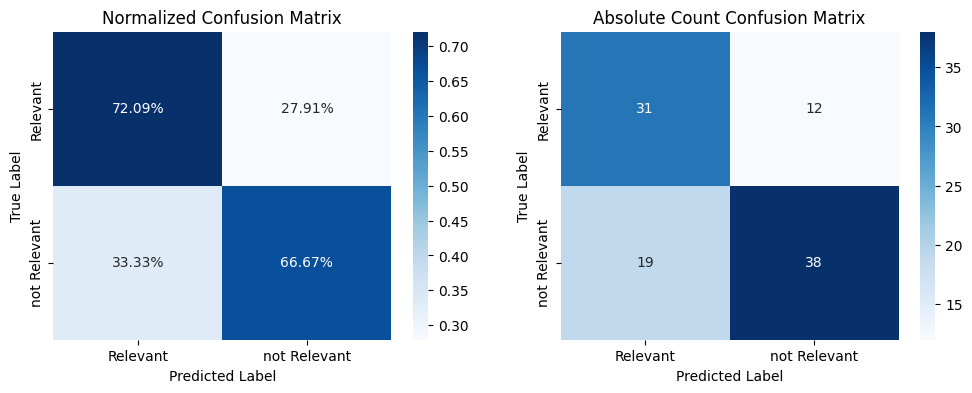

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Convert boolean values in y_true to string values that match those in y_pred
y_true = df1['is_relevant'].map({True: 'Relevant', False: 'not Relevant'})

# Convert boolean values in y_pred to string values that match those in y_true
y_pred = df1['Label'].map({True: 'Relevant', False: 'not Relevant'})

# Compute confusion matrix
conf_mat = confusion_matrix(y_true, y_pred, labels=['Relevant', 'not Relevant'])

# Normalize confusion matrix
conf_mat_norm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

# Create subplots for two confusion matrices
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Generate heatmap plot with annotations for normalized confusion matrix
sns.heatmap(conf_mat_norm, annot=True, fmt='.2%', cmap='Blues', ax=axes[0])

# Add axis labels and title for normalized confusion matrix
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_title('Normalized Confusion Matrix')

# Add class names to axis ticks
axes[0].xaxis.set_ticklabels(['Relevant', 'not Relevant'])
axes[0].yaxis.set_ticklabels(['Relevant', 'not Relevant'])

# Generate heatmap plot with annotations for absolute count confusion matrix
sns.heatmap(conf_mat, annot=True, cmap='Blues', ax=axes[1])

# Add axis labels and title for absolute count confusion matrix
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('Absolute Count Confusion Matrix')

# Add class names to axis ticks
axes[1].xaxis.set_ticklabels(['Relevant', 'not Relevant'])
axes[1].yaxis.set_ticklabels(['Relevant', 'not Relevant'])

# Show plot
plt.show()

In [73]:
from sklearn.metrics import accuracy_score, f1_score
# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
# Calculate F1-score
f1 = f1_score(y_true, y_pred, pos_label='Relevant')
# Show accuracy and F1-score
print("Accuracy:", accuracy)
print("F1-score:", f1)

Accuracy: 0.69
F1-score: 0.6666666666666666
